# **Trabalho Computacional 3 - Rede Convolucional e Transfer Learning**

Aluno: Gabriel Francsico de Oliveira Castro

Matrícula: 202066571

Aluno: Bruno Barros Xavier

Matrícula: 200015621

## Objetivo

 Treinar uma MLP em conjunto de dados de flores para comparação e depois executar o mesmo treinamento em uma Rede Neural Convolucional com o mesmo conjunto de dados de flores, utilizando um modelo já pré-treinado.

## Introdução

Para classificar imagens, redes neurais convolucionais provaram ser particularmente poderosas. No entanto, as redes neurais convolucionais modernas possuem milhões de parâmetros. Treiná-los do zero requer muitos dados de treinamento rotulados e muito poder de computação. Por isso usaremos uma técnica chamada aprendizagem por transferência, na qual pegamos uma rede pré-treinada usamos parte da rede como entrada e treinamos uma nova camada no topo para nossa própria tarefa de classificar imagens de flores.

**Bibliotecas e funções usadas**

In [ ]:
# Bibliotecas

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models # Importando o modelo
from tensorflow.keras.callbacks import EarlyStopping # Importando o Early Stop

## Importando o VGG16
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# Função usada para baixar a base de dados

## Loading images and labels
(train_ds, train_labels), (test_ds, test_labels) = tfds.load(
    "tf_flowers",
    split=["train[:70%]", "train[:30%]"], ## Train test split
    batch_size=-1,
    as_supervised=True, # Include labels
)
## Resizing images
train_ds = tf.image.resize(train_ds, (150, 150))
test_ds = tf.image.resize(test_ds, (150, 150))

## Transforming labels to correct format
train_labels = to_categorical(train_labels, num_classes=5)
test_labels = to_categorical(test_labels, num_classes=5)
print (train_ds.shape)
print (test_ds.shape)


(2569, 150, 150, 3)
(1101, 150, 150, 3)


**0) O que é a base de dados TensorFlow Flowers Dataset?**


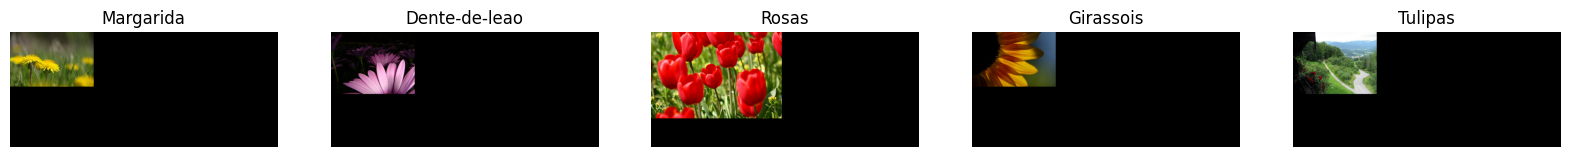

In [ ]:
import matplotlib.pyplot as plt

# Criar um dicionário para mapear os rótulos para nomes de classe
nomes_classes = ['Margarida', 'Dente-de-leao', 'Rosas', 'Girassois', 'Tulipas']
rotulo_para_nome = dict(zip(range(len(nomes_classes)), nomes_classes))

# Obter rótulos como array NumPy
rótulos_treino_np = train_labels.numpy()


plt.figure(figsize=(20, 4))  #  <---- Ajuste aqui o valor de largura e altura conforme necessário

for i, rotulo in enumerate(set(rótulos_treino_np)):
    # Encontrar a primeira imagem para cada categoria
    índice = tf.where(tf.equal(train_labels, rotulo)).numpy()[0][0]
    imagem = train_ds[índice].numpy()

    # Obter o nome da categoria
    nome_categoria = rotulo_para_nome[rotulo]

    # Adicionar subparcela à grade
    plt.subplot(1, len(set(rótulos_treino_np)), i + 1)
    plt.imshow(imagem)
    plt.title(nome_categoria)
    plt.axis('off')

plt.show()


O conjunto de dados **TensorFlow Flowers Dataset** consiste em mais de três mil imagens etiquetadas de flores com 5 rótulos de classe possíveis: Margarida, Dente-de-leão, Rosas, Girassóis e Tulipas. Todavia, cada imagem de sua categoria é diferente, uma vez que cada foto é única.


**1) Treinando um MLP**

In [ ]:
# Número de épocas
max_epochs = 50 # --> Muda aqui o número

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(64, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')

model = models.Sequential([##Joga aqui o VGG
flatten_layer,
dense_layer_1,
dense_layer_2,
prediction_layer
])

# Configurando o modelo
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Adicionando EarlyStopping
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)

# Treinando o modelo
model.fit(train_ds, train_labels, epochs=max_epochs, validation_split=0.2, batch_size=32, callbacks=[es])

# Avaliando o desempenho do MLP
loss, accuracy = model.evaluate(test_ds, test_labels)
print(

)
print(f"A acurácia encontrada foi de {accuracy*100:.2f}%")

Epoch 1/50
65/65 [==============================] - 10s 130ms/step - loss: 264.7646 - accuracy: 0.2813 - val_loss: 218.0423 - val_accuracy: 0.3268
Epoch 2/50
65/65 [==============================] - 7s 101ms/step - loss: 113.1868 - accuracy: 0.3669 - val_loss: 113.4261 - val_accuracy: 0.2996
Epoch 3/50
65/65 [==============================] - 8s 118ms/step - loss: 66.3693 - accuracy: 0.4200 - val_loss: 92.9035 - val_accuracy: 0.3521
Epoch 4/50
65/65 [==============================] - 7s 103ms/step - loss: 38.2795 - accuracy: 0.4779 - val_loss: 52.9348 - val_accuracy: 0.3560
Epoch 5/50
65/65 [==============================] - 8s 123ms/step - loss: 35.0769 - accuracy: 0.4754 - val_loss: 54.9803 - val_accuracy: 0.3735
Epoch 6/50
65/65 [==============================] - 7s 100ms/step - loss: 32.4083 - accuracy: 0.4959 - val_loss: 53.6715 - val_accuracy: 0.3541
Epoch 7/50
65/65 [==============================] - 8s 123ms/step - loss: 19.7842 - accuracy: 0.5674 - val_loss: 37.1692 - val_accu

Observando a acurácia percebemos que ela está baixa, todavia isso era exatamente o esperado, uma vez que o treinamento do modelo não é muito bom uma vez que comparada com o VGG não é pré-treinada.



**2) Usando a rede VGG-16 pré treinada**
    

**2a) O que é o VGG-16?**

In [ ]:
## Carregando o VGG16
base_model = VGG16(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)

base_model.trainable = False ## Not trainable weights
## Preprocessing input

train_ds = preprocess_input(train_ds)
test_ds = preprocess_input(test_ds)


 VGG-16 pré-treinada é a uma arquitetura de rede neural convolucional que foi treinada utilizando grandes conjuntos de dados. Nesse sentido, esse pré-treinamento permite que a rede aprenda representações úteis de características em imagens, tornando-se eficaz como ponto de partida para classificação de imagens.

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     


**2b) Retreinando e Reavaliando**



In [ ]:
# Número de épocas
max_epochs = 50 # --> Muda aqui o número

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')

model = models.Sequential([##Joga aqui VGG
base_model,
flatten_layer,
dense_layer_1,
dense_layer_2,
prediction_layer
])

# Configurando o modelo
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Adicionando EarlyStopping
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)

# Treinando o modelo
model.fit(train_ds, train_labels, epochs=max_epochs, validation_split=0.2, batch_size=32, callbacks=[es])

# Avaliando o desempenho do MLP
loss, accuracy = model.evaluate(test_ds, test_labels)
print(

)
print(f"A acurácia encontrada foi de {accuracy*100:.2f}%")

Epoch 1/50
65/65 [==============================] - 605s 9s/step - loss: 2.0741 - accuracy: 0.4618 - val_loss: 1.2737 - val_accuracy: 0.5798
Epoch 2/50
65/65 [==============================] - 600s 9s/step - loss: 0.8523 - accuracy: 0.6934 - val_loss: 1.1345 - val_accuracy: 0.6420
Epoch 3/50
65/65 [==============================] - 600s 9s/step - loss: 0.5813 - accuracy: 0.7771 - val_loss: 1.0498 - val_accuracy: 0.6693
Epoch 4/50
65/65 [==============================] - 593s 9s/step - loss: 0.4442 - accuracy: 0.8394 - val_loss: 1.0906 - val_accuracy: 0.6673
Epoch 5/50
65/65 [==============================] - 580s 9s/step - loss: 0.3414 - accuracy: 0.8827 - val_loss: 1.2629 - val_accuracy: 0.6732
Epoch 6/50
65/65 [==============================] - 576s 9s/step - loss: 0.2381 - accuracy: 0.9187 - val_loss: 1.2047 - val_accuracy: 0.6829
Epoch 7/50
65/65 [==============================] - 575s 9s/step - loss: 0.1701 - accuracy: 0.9416 - val_loss: 1.2130 - val_accuracy: 0.6868
Epoch 8/50
65

Obtemos uma acurácia de 99,46%, o resultado obtido foi o esperado uma vez que o VGG resolve problemas de classificação de maneira extremamente satisfória.